In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import transactionencoder

In [129]:
movie=pd.read_csv("my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [131]:
movie2 = pd.get_dummies(movie)
min(movie.mean())

0.1

In [136]:
frequent1 = apriori(movie2,min_support=0.6,use_colnames=True)
frequent1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Gladiator, Patriot)"
6,0.6,"(Gladiator, V1_Gladiator)"
7,0.6,"(Gladiator, V2_Patriot)"
8,0.6,"(Patriot, V1_Gladiator)"
9,0.6,"(V2_Patriot, Patriot)"


In [137]:
frequent2= apriori(movie2,min_support =0.5,use_colnames=True)
frequent2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(Patriot, V1_Gladiator)"


In [138]:
rule1= association_rules(frequent1,metric='confidence',min_threshold=0.)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [139]:
rule2 = association_rules(frequent2,metric='confidence',min_threshold=1)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
5,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
6,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
7,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
8,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
9,"(Gladiator, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [140]:
result1 = rule1.sort_values('lift',ascending=False)
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
23,(Patriot),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
30,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
31,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
32,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
33,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
34,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
35,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [141]:
result2 = rule2.sort_values('lift',ascending = False)
result2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42,(V1_Gladiator),"(Gladiator, V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,"(Gladiator, V1_Gladiator)","(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
20,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(V2_Patriot, V1_Gladiator)","(Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
23,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
25,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [142]:
fresult1 = pd.DataFrame(result1[result1.lift>1.6])
fresult1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
23,(Patriot),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [143]:
fresult2 = pd.DataFrame(result2[result2.lift>1.6])
fresult2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42,(V1_Gladiator),"(Gladiator, V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,"(Gladiator, V1_Gladiator)","(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
20,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(V2_Patriot, V1_Gladiator)","(Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
23,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
25,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


<AxesSubplot:>

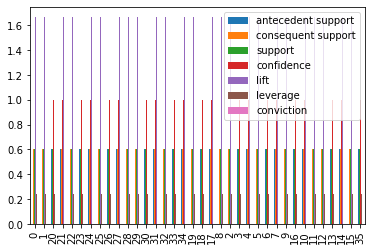

In [68]:
fresult1.plot(kind='bar')

<AxesSubplot:>

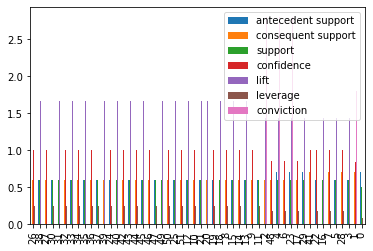

In [69]:
fresult2.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

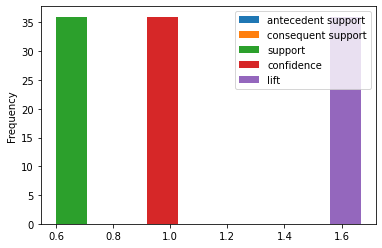

In [70]:
fresult1.iloc[:,0:7].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

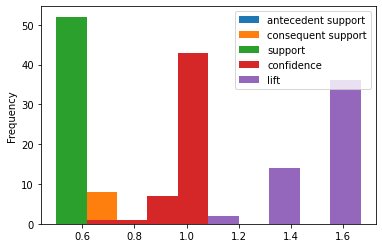

In [71]:
fresult2.iloc[:,1:7].plot(kind='hist')

In [75]:
from pyvis import network as net
import networkx as nx

g= net.Network(notebook=True)
nxg = nx.complete_graph(16)
g.from_nx(nxg)
g.show('fresult1.html')

In [145]:
g = net.Network(notebook='True')
nxg = nx.complete_graph(19)
g.from_nx(nxg)
g.show('fresult2.html')